**Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Carbon Per Capita


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Average CO2 emission in metric tons per person during the given year, calculated from deviding the total CO2 with the total population of the countries.

https://docs.google.com/spreadsheets/d/1RjqGm7RG82GGVf7E4RXPPwFF7O1So6T0SFx2fVfcUJA/pub?range=A1:D70&gid=1&output=html#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# read data
co2 = pd.read_csv("data/indicator CDIAC carbon_dioxide_emissions_per_capita.csv")

# how big is the dataset?
print co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 254 entries, CO2 per capita to 2012
dtypes: float64(253), object(1)
memory usage: 466.4+ KB
None


In [3]:
# what does it look like?
print co2.head()

          CO2 per capita  1751  1755  1762  1763  1764  1765  1766  1767  \
0               Abkhazia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1            Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  Akrotiri and Dhekelia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3                Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4                Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1768    ...         2003      2004      2005      2006      2007      2008  \
0   NaN    ...          NaN       NaN       NaN       NaN       NaN       NaN   
1   NaN    ...     0.022704  0.027472  0.036780  0.047090  0.068312  0.131602   
2   NaN    ...          NaN       NaN       NaN       NaN       NaN       NaN   
3   NaN    ...     1.382066  1.332966  1.353789  1.224310  1.279420  1.297753   
4   NaN    ...     2.899236  2.762220  3.257010  3.113135  3.312875  3.328945   

       2009      2010      2011      2012  
0       NaN 

#### Observations

* The data goes back a long way, but there are a lot of NaNs in those early years.
* There are also NaNs in more recent years too, which could be informative.
* The country column heading should be changed.

In [4]:
# summary stats
co2.describe()

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,200.000000,200.000000,200.000000,200.000000,201.000000,201.000000,201.000000,201.000000,65.000000,65.000000
mean,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,5.160597,5.266567,5.242741,5.250673,5.387444,5.293425,5.064836,5.189779,8.395975,8.391032
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.892710,7.222377,7.198735,6.950140,7.281876,6.858804,6.479270,6.538857,7.796528,8.041490
min,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,0.022704,0.027472,0.021237,0.025019,0.003482,0.008618,0.011942,0.008443,0.401268,0.426003
25%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,0.610230,0.682390,0.730938,0.681245,0.645242,0.613104,0.609647,0.640119,4.196912,4.141014
50%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,3.216404,3.242589,3.302545,3.301199,3.164370,3.277726,3.106366,3.263605,6.722385,6.506759
75%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,7.514300,7.530032,7.296806,7.463160,7.555909,7.293089,6.782996,6.983513,9.513115,9.194220
max,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,55.322622,62.069377,63.187436,57.986895,57.066817,48.702062,41.378843,40.098333,41.220928,46.643197


In [5]:
# give better name to first columns
co2.rename(columns = {'CO2 per capita' : 'country'}, inplace = True)

In [6]:
co2.head()

,country,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [7]:
# how many countries have data from 1751?
co2['1751'].describe()

count    1.000000
mean     1.131253
std           NaN
min      1.131253
25%      1.131253
50%      1.131253
75%      1.131253
max      1.131253
Name: 1751, dtype: float64

Not surprisingly, only one country has data going that far back. Which one?

In [8]:
# Which country has data for 1751?
co2.loc[pd.notnull(co2['1751'])]

,country,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
219,United Kingdom,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,...,9.069663,9.022278,9.001868,8.952901,8.684595,8.526467,7.705539,7.954469,7.324996,7.502533


But of course, the foremost colonial power of the era!

In [9]:
# How many countries do not have data in the last year?
missing_recent = co2.loc[pd.isnull(co2['2012'])]
len(missing_recent)

170

###  Sanity checks

Which countries have the highest cumulative CO2?


In [10]:
# change index for simpler aggregating
co2 = co2.set_index('country')

In [11]:
co2.sum(1).sort_values(ascending = False)

country
Qatar                       3005.390701
United States               2043.289976
Brunei                      2006.882965
United Kingdom              1784.762577
Luxembourg                  1758.837129
United Arab Emirates        1703.118653
Kuwait                      1624.240671
Bahrain                     1558.783103
Canada                      1410.204984
Belgium                     1379.276171
Trinidad and Tobago         1264.426704
Germany                     1210.906480
Australia                   1088.688431
Netherlands                  889.863537
Slovak Republic              845.036499
Denmark                      805.823307
Russia                       792.381253
Poland                       780.967275
France                       732.874690
New Caledonia                718.242462
Netherlands Antilles         706.418690
Austria                      697.931600
Saudi Arabia                 686.246180
Bahamas                      685.328774
South Africa                 643

#### Observations

Most of the top 10 are unsurprising: rich and/or oil-producing countries.

However, there are surprises too: Belgium, Trinidad & Tobago, and Luxembourg. Perhaps this is reflects data that goes back further for those countries. 

Let's compare with the means.

In [12]:
# which countries have the highest mean CO2?
co2.mean(1).sort_values(ascending = False).head(10)

country
Qatar                   46.959230
United Arab Emirates    31.539234
Netherlands Antilles    28.256748
Luxembourg              26.649047
Brunei                  24.776333
Kuwait                  24.242398
Aruba                   20.710109
Bahrain                 19.984399
Nauru                   12.399117
Kazakhstan              12.058241
dtype: float64

#### Observations

Now the top 10 is nearly all oil-rich countries. Nonetheless, we still have Luxembourg in the top 10, along with Netherlands Antilles. And other Caribbean island countries are near the top.

Also...the bottom results show that we have many rows without any values.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning

### Remove empty rows

In [13]:
# how many rows without values?
len(co2.loc[co2.sum(1).isnull()])

0

In [14]:
# remove rows without any data
co2 = co2.dropna(how = 'all')

# verify
co2.loc[co2.sum(1).isnull()]

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,,


## Add region & sub-region columns

Data from https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

CO2 patterns, I suspect, vary a lot by region and not just by country. 

For my analysis, I'd like to primarily focus on Europe since that's where I'm currently living. 

In [15]:
co2.head()

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.414281,7.499690,7.390955,6.839940,6.622435,6.527241,6.178520,6.092100,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.587810,1.177610,1.161662,1.308849,1.435044,1.474353,1.500054,1.593918,NaN,NaN


In [16]:
# reset index so that 'country' is a column
co2 = co2.reset_index()

In [17]:
# verify
co2.head()

,country,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.414281,7.499690,7.390955,6.839940,6.622435,6.527241,6.178520,6.092100,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.587810,1.177610,1.161662,1.308849,1.435044,1.474353,1.500054,1.593918,NaN,NaN


In [18]:
# use later?
def prep_df(df):
    # Make a copy & reshape df so it can 
    # be converted to long (tidy) format.
    # Assume 'country' is a column, not index
    df_copy = df.copy() 
    df_copy = df_copy.set_index('country')
    df_yr_ix = df_copy.T
    df_yr_ix = df_yr_ix.reset_index()
    df_yr_ix.rename(columns = {"index" : "year"}, inplace = True)
    
    # create list of country names for use as value columns
    cols = (list(df_yr_ix.columns.values))[1:]
    
    # convert to long format
    df_yr_long = pd.melt(df_yr_ix, id_vars = 'year', value_vars = cols)

    
    return df_yr_long

#co2_long = prep_df(co2)

# verify by looking at country with data for all years
#co2_long[co2_long.country == 'United Kingdom']

### Create regions df from json file

In [19]:
# add continent and region info for
# better grouping

regions = pd.read_json('data/all_countries.json')
regions = regions[['name', 'region', 'sub-region']]

In [20]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 3 columns):
name          249 non-null object
region        240 non-null object
sub-region    240 non-null object
dtypes: object(3)
memory usage: 7.8+ KB


In [21]:
# what are the 9 rows with null region & sub-region?
regions.loc[regions.region.isnull()]

,name,region,sub-region
8,Antarctica,None,None
30,Bouvet Island,None,None
32,British Indian Ocean Territory,None,None
46,Christmas Island,None,None
47,Cocos (Keeling) Islands,None,None
78,French Southern Territories,None,None
96,Heard Island and McDonald Islands,None,None
206,South Georgia and the South Sandwich Islands,None,None
236,United States Minor Outlying Islands,None,None


In [22]:
# give better name to country column
# also easier for merging with gapminder df

regions = regions.rename(columns = {'name':'country'})

In [23]:
# drop countries without any region data
regions = regions.dropna(how = 'any')

# verify
regions.loc[regions.region.isnull()]

,country,region,sub-region


The merge will be on the country. 

To simplify things, let's rename the regions.name column

In [24]:
# how many different regions?
regions.region.unique()

array([u'Asia', u'Europe', u'Africa', u'Oceania', u'Americas'],
      dtype=object)

In [25]:
# how many countries in the regions df?
len(regions.country)

240

In [26]:
# examine the join field for the merge
list(regions.country)

[u'Afghanistan',
 u'\xc5land Islands',
 u'Albania',
 u'Algeria',
 u'American Samoa',
 u'Andorra',
 u'Angola',
 u'Anguilla',
 u'Antigua and Barbuda',
 u'Argentina',
 u'Armenia',
 u'Aruba',
 u'Australia',
 u'Austria',
 u'Azerbaijan',
 u'Bahamas',
 u'Bahrain',
 u'Bangladesh',
 u'Barbados',
 u'Belarus',
 u'Belgium',
 u'Belize',
 u'Benin',
 u'Bermuda',
 u'Bhutan',
 u'Bolivia (Plurinational State of)',
 u'Bonaire, Sint Eustatius and Saba',
 u'Bosnia and Herzegovina',
 u'Botswana',
 u'Brazil',
 u'Brunei Darussalam',
 u'Bulgaria',
 u'Burkina Faso',
 u'Burundi',
 u'Cambodia',
 u'Cameroon',
 u'Canada',
 u'Cabo Verde',
 u'Cayman Islands',
 u'Central African Republic',
 u'Chad',
 u'Chile',
 u'China',
 u'Colombia',
 u'Comoros',
 u'Congo',
 u'Congo (Democratic Republic of the)',
 u'Cook Islands',
 u'Costa Rica',
 u"C\xf4te d'Ivoire",
 u'Croatia',
 u'Cuba',
 u'Cura\xe7ao',
 u'Cyprus',
 u'Czech Republic',
 u'Denmark',
 u'Djibouti',
 u'Dominica',
 u'Dominican Republic',
 u'Ecuador',
 u'Egypt',
 u'El Sa

In [27]:
# how many countries remain in co2 df)?
#len(co2_long.country.unique())
len(co2)

201

In [28]:
# examine co2 join field
list(co2.country.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 '

So `regions` df has 39 more countries than `co2_long` df, which will be the driving table for the merge. This is easier to work with than vice versa.

Obvious problems:

* accents (in regions df only)
* long-winded names (us, uk of gb & n ireland)
* parenthesis (virgin islands)
* extra spaces

### Clean up 'country' column in both dataframes

In [29]:
# remove accents from countries in regions df
import unidecode
regions.country = regions.country.apply(unidecode.unidecode)

In [30]:
# remove special chars
import re

def remove_special_char(s):
    clean_s = re.sub('\W+',' ', s)
    return clean_s

In [31]:
co2.country = co2.country.apply(remove_special_char)

In [32]:
regions.country = regions.country.apply(remove_special_char)

In [33]:
# verify
list(regions.country)

['Afghanistan',
 'Aland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia Plurinational State of ',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cabo Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo Democratic Republic of the ',
 'Cook Islands',
 'Costa Rica',
 'Cote d Ivoire',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falk

In [34]:
list(co2.country)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo Dem Rep ',
 'Congo Rep ',
 'Costa Rica',
 'Cote d Ivoire',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Gua

### Merge `co2` with `regions`

In [43]:
# merge co2 df with region df

co2_regions = co2.merge(regions, how = 'left', on='country')

# rearrange col order

cols = co2_regions[['region', 'sub-region']]

co2_regions.drop(labels=['region', 'sub-region'], axis=1,inplace = True)
co2_regions.insert(1, 'region', cols['region'])
co2_regions.insert(2, 'sub-region', cols['sub-region'])

In [44]:
# still have 201 countries?
len(co2_regions.country.unique())

201

In [45]:
co2_regions.head()

,country,region,sub-region,1751,1755,1762,1763,1764,1765,1766,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Afghanistan,Asia,Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
1,Albania,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
2,Algeria,Africa,Northern Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.414281,7.499690,7.390955,6.839940,6.622435,6.527241,6.178520,6.092100,NaN,NaN
4,Angola,Africa,Middle Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.587810,1.177610,1.161662,1.308849,1.435044,1.474353,1.500054,1.593918,NaN,NaN


In [46]:
# how many countries didn't match up?
len(co2_regions.loc[co2_regions.region.isnull()])

25

In [47]:
# which countries were they?
co2_regions.loc[co2_regions.region.isnull()]

,country,region,sub-region,1751,1755,1762,1763,1764,1765,1766,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
23,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.602519,1.456394,1.347341,1.601935,1.347951,1.431829,1.474029,1.556418,NaN,NaN
27,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.590413,3.882571,4.001819,4.448838,4.560733,4.671529,4.781154,5.047681,NaN,NaN
28,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.359649,15.060464,14.116429,13.020376,26.952714,27.507506,23.206929,22.960326,NaN,NaN
35,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.549963,0.565572,0.620308,0.643992,0.645242,0.631962,0.633957,0.717071,NaN,NaN
42,Congo Dem Rep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031381,0.034723,0.038761,0.040894,0.042838,0.045133,0.042375,0.046079,NaN,NaN
43,Congo Rep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.322520,0.342643,0.411999,0.368833,0.385281,0.384220,0.478165,0.501538,NaN,NaN
59,Faeroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.374565,16.605795,15.879923,15.808836,15.928244,14.788293,13.724079,14.604035,NaN,NaN
81,Hong Kong China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.872271,5.642391,5.953476,5.641943,5.814144,5.568527,5.293808,5.144529,5.515206,5.341218
86,Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.153554,6.494674,6.729846,7.223400,7.555637,7.892211,7.895172,7.726537,7.824127,7.977037
105,Macao China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.343809,3.673475,3.816033,3.307877,2.776959,2.298460,2.450450,1.895194,NaN,NaN


### Match countries using partial string matching

When entering search queries, spellcheck puts a lot of weight on the first character, assuming that because it's so important, it's far less likely for users to missspell it. 

I am guessing that we can match up most countries by assuming the key word is the **first** word in the `country` field.

In [48]:
# create df of countries that didn't have any matches in regions df

no_match = co2_regions.loc[co2_regions.region.isnull()].country

In [49]:
# verify
len(no_match)

25

In [50]:
# loop through countries without region data
# and look for partial string matches

matches = []
for country in no_match:
    poss_match = {'co2_country': country}
    country_split = str.split(country)
    
    # does the field start with country name?
    if regions.country.str.startswith(country).any():
            poss_match['regions_country'] = dict(regions[regions.country.str.startswith(country)].country)
    
    # does the field contain the first word of the country match?
    elif regions.country.str.contains(country_split[0]).any():
            poss_match['regions_country'] = dict(regions[regions.country.str.contains(country_split[0])].country)
            
    # does the field contain the second word of the country?
    elif len(country_split) > 1: 
        if regions.country.str.contains(country_split[1]).any():
            poss_match['regions_country'] = dict(regions[regions.country.str.contains(country_split[1])].country)
        else: 
            poss_match['regions_country'] = None
    else:
        poss_match['regions_country'] = None
        
    matches.append(poss_match)

In [51]:
pp.pprint(matches)

[{'co2_country': 'Bolivia',
  'regions_country': {26: 'Bolivia Plurinational State of '}},
 {'co2_country': 'British Virgin Islands',
  'regions_country': {242: 'Virgin Islands British '}},
 {'co2_country': 'Brunei', 'regions_country': {33: 'Brunei Darussalam'}},
 {'co2_country': 'Cape Verde', 'regions_country': {40: 'Cabo Verde'}},
 {'co2_country': 'Congo Dem Rep ',
  'regions_country': {50: 'Congo', 51: 'Congo Democratic Republic of the '}},
 {'co2_country': 'Congo Rep ',
  'regions_country': {50: 'Congo', 51: 'Congo Democratic Republic of the '}},
 {'co2_country': 'Faeroe Islands',
  'regions_country': {1: 'Aland Islands',
                      41: 'Cayman Islands',
                      52: 'Cook Islands',
                      71: 'Falkland Islands Malvinas ',
                      72: 'Faroe Islands',
                      138: 'Marshall Islands',
                      164: 'Northern Mariana Islands',
                      203: 'Solomon Islands',
                      229: 'Turks

In [52]:
# confirm matches when there is only one suggested match found
for dct in matches:
    if dct['regions_country'] == None:
        dct['matched'] = "n"
    elif  len(dct['regions_country']) > 1:
        dct['matched'] = 'n'
    elif len(dct['regions_country']) == 1:
        print dct
        dct['matched'] = raw_input('Is this a match? ([y] or n) ') or 'y'
        if dct['matched'] == 'y':
            #print dct['regions_country'].keys()[0]
            matching_key = dct['regions_country'].keys()[0]
            dct['regions_country'] = dct['regions_country'].values()[0]
            dct['matched'] = 'y'
            
            # add region & sub-region values from regions df
            dct['region'] = regions.region.at[int(matching_key)]
            dct['sub-region'] = regions['sub-region'].at[int(matching_key)]
    else:
        dct['matched'] = 'n'
        

{'co2_country': 'Bolivia', 'regions_country': {26: 'Bolivia Plurinational State of '}}
Is this a match? ([y] or n) 
{'co2_country': 'British Virgin Islands', 'regions_country': {242: 'Virgin Islands British '}}
Is this a match? ([y] or n) 
{'co2_country': 'Brunei', 'regions_country': {33: 'Brunei Darussalam'}}
Is this a match? ([y] or n) 
{'co2_country': 'Cape Verde', 'regions_country': {40: 'Cabo Verde'}}
Is this a match? ([y] or n) 
{'co2_country': 'Hong Kong China', 'regions_country': {99: 'Hong Kong'}}
Is this a match? ([y] or n) 
{'co2_country': 'Iran', 'regions_country': {104: 'Iran Islamic Republic of '}}
Is this a match? ([y] or n) 
{'co2_country': 'Macao China', 'regions_country': {130: 'Macao'}}
Is this a match? ([y] or n) 
{'co2_country': 'Macedonia FYR', 'regions_country': {131: 'Macedonia the former Yugoslav Republic of '}}
Is this a match? ([y] or n) 
{'co2_country': 'Micronesia Fed Sts ', 'regions_country': {144: 'Micronesia Federated States of '}}
Is this a match? ([y] 

In [53]:
##### for multiple matches (stored as dict), select correct country

for dct in matches:
    if isinstance(dct['regions_country'], dict):
        pp.pprint(dct)
        matching_key = raw_input('Enter the key number of the matching country. If none match, type \'n\'.')
        if matching_key == 'n':
            dct['regions_country'] = None
            dct['matched'] = matching_key

        elif matching_key != 'n':
            while int(matching_key) not in dct['regions_country'].keys():
                print "Error: you entered "+ matching_key
                print "This is not a valid key number. Please try again."
                print "Valid keys are:"
                print dct['regions_country'].keys()
                matching_key = raw_input('Enter the key number of the matching country. If none match, type \'n\'.')

        
            print "You selected " + dct['regions_country'][int(matching_key)] + "."
            dct['regions_country'] = dct['regions_country'][int(matching_key)]
            dct['matched'] = 'y'
            
            # add region & sub-region values from regions df
            dct['region'] = regions.region.at[int(matching_key)]
            dct['sub-region'] = regions['sub-region'].at[int(matching_key)]

    else:
        pass

{'co2_country': 'Congo Dem Rep ',
 'matched': 'n',
 'regions_country': {50: 'Congo', 51: 'Congo Democratic Republic of the '}}
Enter the key number of the matching country. If none match, type 'n'.51
You selected Congo Democratic Republic of the .
{'co2_country': 'Congo Rep ',
 'matched': 'n',
 'regions_country': {50: 'Congo', 51: 'Congo Democratic Republic of the '}}
Enter the key number of the matching country. If none match, type 'n'.50
You selected Congo.
{'co2_country': 'Faeroe Islands',
 'matched': 'n',
 'regions_country': {1: 'Aland Islands',
                     41: 'Cayman Islands',
                     52: 'Cook Islands',
                     71: 'Falkland Islands Malvinas ',
                     72: 'Faroe Islands',
                     138: 'Marshall Islands',
                     164: 'Northern Mariana Islands',
                     203: 'Solomon Islands',
                     229: 'Turks and Caicos Islands',
                     242: 'Virgin Islands British ',
           

In [54]:
matches_df = pd.DataFrame(matches)

In [55]:
matches_df

,co2_country,matched,region,regions_country,sub-region
0,Bolivia,y,Americas,Bolivia Plurinational State of,South America
1,British Virgin Islands,y,Americas,Virgin Islands British,Caribbean
2,Brunei,y,Asia,Brunei Darussalam,South-Eastern Asia
3,Cape Verde,y,Africa,Cabo Verde,Western Africa
4,Congo Dem Rep,y,Africa,Congo Democratic Republic of the,Middle Africa
5,Congo Rep,y,Africa,Congo,Middle Africa
6,Faeroe Islands,y,Europe,Faroe Islands,Northern Europe
7,Hong Kong China,y,Asia,Hong Kong,Eastern Asia
8,Iran,y,Asia,Iran Islamic Republic of,Southern Asia
9,Macao China,y,Asia,Macao,Eastern Asia


### Less straightforward matching

In [73]:
# what's left?
matches_df.loc[matches_df.matched == 'n']

,matched,region,regions_country,sub-region
co2_country,,,,
Netherlands Antilles,n,Americas,Sint Maarten Dutch part,Caribbean
West Bank and Gaza,n,Asia,Palestine State of,Western Asia
Vietnam,n,Asia,Viet Nam,South-Eastern Asia


#### Netherlands Antilles

This reveals a missing step in my matching code: it doesn't allow for matches on first word OR second word. 'Antilles' should have yielded a match, but since the code first checks for a match on first word without any further checks, it never made the list of 'possible matches'.

On the otherhand, the logic matched up  22 out of 25 countries, so it doesn't seem worth the additional lines of code to match one more country.

In [74]:
regions.loc[regions['country'].str.contains('Antilles')]

,country,region,sub-region


In [75]:
regions.loc[regions['country'].str.contains('Dutch')]

,country,region,sub-region
200,Sint Maarten Dutch part,Americas,Caribbean


In [76]:
# functions to fill missing regions
# data in matches_df 

def create_val_dict(country, df = regions): 
    # use for manual matching
    val_dict = df.loc[df.country == country].to_dict()
    val_dict['regions_country'] = val_dict.pop('country')
    for key in val_dict.keys():
        val_dict[key] = val_dict[key].values()[0]
    return val_dict
    
def iloc_fillna(i, val_dict, df = matches_df):
    df.iloc[i] = df.iloc[i].fillna(val_dict)
    return df

In [77]:
# add missing info for Netherland Antilles

def fill_empty_cols(regions_ix, matches_ix):
    regions_cntry= regions.loc[regions_ix].country # get country string from source df
    val_dict = create_val_dict(regions_cntry) # create dict of col values from source df
    matches_df = iloc_fillna(matches_ix, val_dict) # update columns in target df
    return matches_df


In [78]:
matches_df = fill_empty_cols(200, 13)

In [79]:
# verify
matches_df.loc[matches_df.matched=='n']

,matched,region,regions_country,sub-region
co2_country,,,,
Netherlands Antilles,n,Americas,Sint Maarten Dutch part,Caribbean
West Bank and Gaza,n,Asia,Palestine State of,Western Asia
Vietnam,n,Asia,Viet Nam,South-Eastern Asia


#### West Bank and Gaza

For 'West Bank and Gaza', I needed to confirm whether this would be considered part of Israel or if it's Palestine. According to Wikipedia, it's a contested issue (at least to Israel) but the general consensus seems to be that 'West Bank and Gaza' are synonymous with 'Palestine'.

In [80]:
regions.loc[regions['country'].str.contains('Palestine')]

,country,region,sub-region
169,Palestine State of,Asia,Western Asia


In [81]:
matches_df = fill_empty_cols(169,23)

In [82]:
matches_df.loc[matches_df['matched'] == 'n']

,matched,region,regions_country,sub-region
co2_country,,,,
Netherlands Antilles,n,Americas,Sint Maarten Dutch part,Caribbean
West Bank and Gaza,n,Asia,Palestine State of,Western Asia
Vietnam,n,Asia,Viet Nam,South-Eastern Asia


#### Vietnam

This is a pure data entry error: early on I had noticed that it was spelled `Viet Nam` in the regions df. 

In [83]:
# In which sub-region will I find Vietnam? 

regions.loc[regions.region=='Asia']['sub-region'].unique()

array([u'Southern Asia', u'Western Asia', u'South-Eastern Asia',
       u'Eastern Asia', u'Central Asia'], dtype=object)

In [84]:
regions.loc[regions['sub-region']=='South-Eastern Asia']
    

,country,region,sub-region
33,Brunei Darussalam,Asia,South-Eastern Asia
37,Cambodia,Asia,South-Eastern Asia
103,Indonesia,Asia,South-Eastern Asia
121,Lao People s Democratic Republic,Asia,South-Eastern Asia
134,Malaysia,Asia,South-Eastern Asia
152,Myanmar,Asia,South-Eastern Asia
174,Philippines,Asia,South-Eastern Asia
199,Singapore,Asia,South-Eastern Asia
220,Thailand,Asia,South-Eastern Asia
221,Timor Leste,Asia,South-Eastern Asia


In [85]:
#val_dict = create_val_dict(regions.loc[241].country)
#matches_df = iloc_fillna(24, val_dict)

matches_df = fill_empty_cols(241, 24)

In [86]:
matches_df.loc[matches_df.matched=='n']

,matched,region,regions_country,sub-region
co2_country,,,,
Netherlands Antilles,n,Americas,Sint Maarten Dutch part,Caribbean
West Bank and Gaza,n,Asia,Palestine State of,Western Asia
Vietnam,n,Asia,Viet Nam,South-Eastern Asia


### Merge missing region data into main df

In [93]:
# make sure source & target df's have same index vals
#matches_df = matches_df.set_index('co2_country')
co2_regions = co2_regions.set_index('country')

In [94]:
# replace missing values in co2_regions df 
# with cols from matches df
co2_regions['region'] = co2_regions['region'].fillna(matches_df['region'])
co2_regions['sub-region'] = co2_regions['sub-region'].fillna(matches_df['sub-region'])

In [95]:
# verify the coutries with previously missing region data are now complete
co2_regions.loc[matches_df.index.values][['region', 'sub-region']]


,region,sub-region
country,,
Bolivia,Americas,South America
British Virgin Islands,Americas,Caribbean
Brunei,Asia,South-Eastern Asia
Cape Verde,Africa,Western Africa
Congo Dem Rep,Africa,Middle Africa
Congo Rep,Africa,Middle Africa
Faeroe Islands,Europe,Northern Europe
Hong Kong China,Asia,Eastern Asia
Iran,Asia,Southern Asia


In [96]:
# verify no more missing values
co2_regions.loc[co2_regions.region.isnull()]

,region,sub-region,1751,1755,1762,1763,1764,1765,1766,1767,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,,


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What does the data look like?

In [97]:
co2_regions.head()

,region,sub-region,1751,1755,1762,1763,1764,1765,1766,1767,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
Albania,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
Algeria,Africa,Northern Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654
Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.414281,7.499690,7.390955,6.839940,6.622435,6.527241,6.178520,6.092100,NaN,NaN
Angola,Africa,Middle Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.587810,1.177610,1.161662,1.308849,1.435044,1.474353,1.500054,1.593918,NaN,NaN


In [98]:
co2_regions = co2_regions.reset_index()
co2_regions = co2_regions.set_index(['region', 'sub-region', 'country'])

In [99]:
co2_regions = co2_regions.sort_index(level = 0)

In [100]:
t = co2_regions.loc['Europe']

#t = t.loc[:, '2003':'2012']
t = t.T
t = t.unstack(level = 1)

In [101]:
df = pd.DataFrame(t)


In [102]:
df = df.reset_index()

In [103]:
df = df.rename(columns={'level_2': 'year', 0: 'value'})

In [104]:
df = df.set_index('year')

In [105]:
df = df.reset_index()

### Pandas plotting

/Users/sarahhosking/anaconda/envs/DAND/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning:

invalid value encountered in less_equal



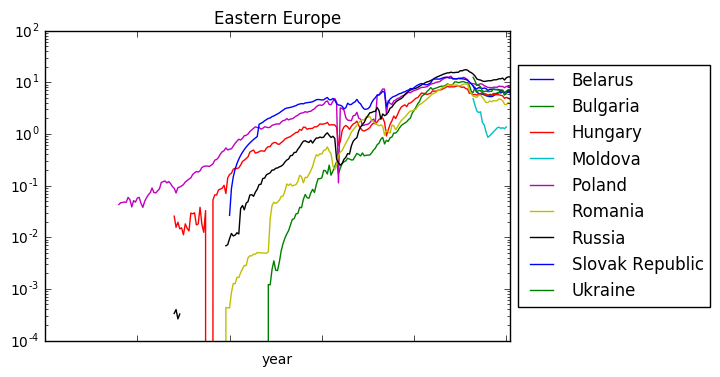

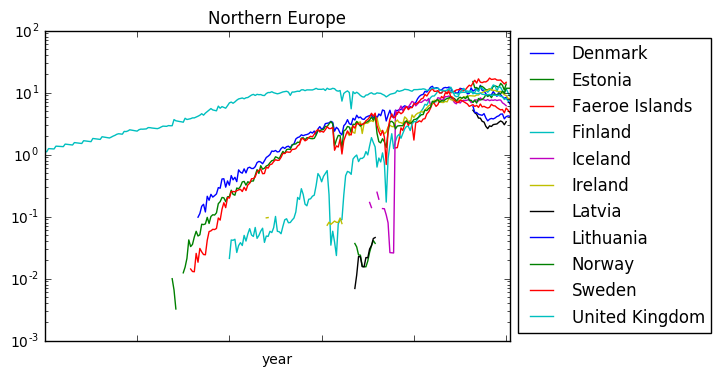

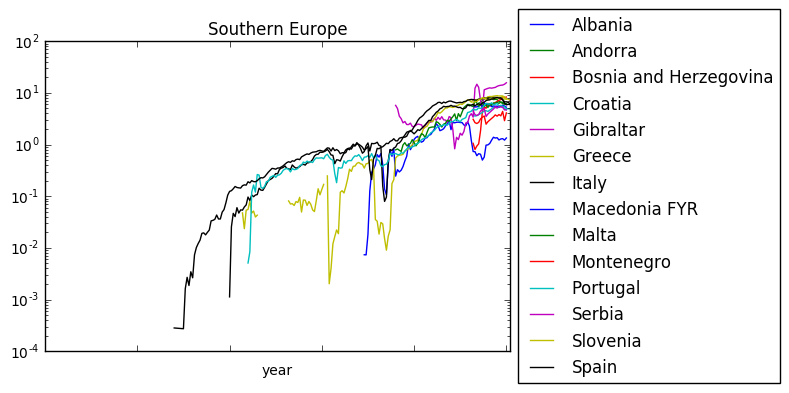

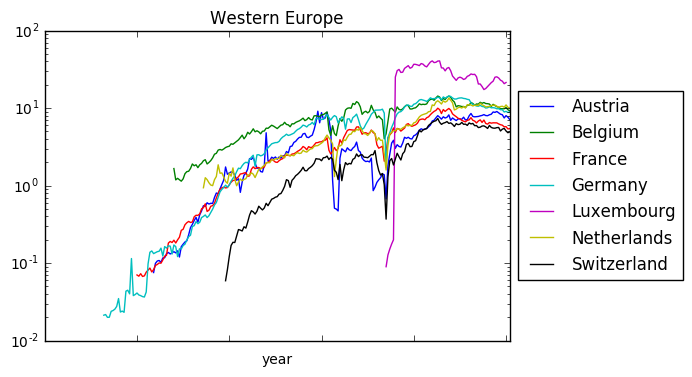

In [106]:
for sub in df['sub-region'].unique():
    df.loc[df['sub-region']==sub].pivot('year', 'country', 'value').plot(logy=True)
    plt.title(sub)
    #plt.legend(loc ='upper center')
    #plt.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [107]:
co2_regions.head()

1751  1755  1762  1763  1764  1765  1766  \
region sub-region     country                                              
Africa Eastern Africa Burundi    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                      Comoros    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                      Djibouti   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                      Eritrea    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                      Ethiopia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                1767  1768  1769  ...       2003      2004  \
region sub-region     country                     ...                        
Africa Eastern Africa Burundi    NaN   NaN   NaN  ...   0.024127  0.028127   
                      Comoros    NaN   NaN   NaN  ...   0.162489  0.164037   
                      Djibouti   NaN   NaN   NaN  ...   0.522036  0.577437   
                      Eritrea    NaN   NaN   NaN  ...   0.175130  0.178309   
                      Ethiopia   NaN   NaN   NaN  ...   0.069879  0.072295   

                                    2005      2006      2007      2008  \
region sub-region     country                                            
Africa Eastern Africa Burundi   0.021237  0.025019  0.024737  0.031389   
                      Comoros   0.171080  0.183178  0.178308  0.178853   
                      Djibouti  0.585130  0.592057  0.580934  0.612800   
                      Eritrea   0.170822  0.120753  0.120731  0.083746   
                      Ethiopia  0.068037  0.071313  0.076099  0.080167   

                                    2009      2010  2011  2012  
region sub-region     country                                   
Africa Eastern Africa Burundi   0.021989  0.036742   NaN   NaN  
                      Comoros   0.174170  0.189634   NaN   NaN  
                      Djibouti  0.609647  0.606493   NaN   NaN  
                      Eritrea   0.100693  0.097709   NaN   NaN  
                      Ethiopia  0.082016  0.078285   NaN   NaN  

[5 rows x 253 columns]

### Plotly + cufflinks plotting

In [109]:
# make interactive
import plotly as py
import cufflinks as cf
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')


for sub in df['sub-region'].unique():
    sub_df = df.loc[df['sub-region']==sub].pivot('year', 'country', 'value')
    fig = sub_df.iplot(asFigure = True,\
                        title = sub,\
                        yTitle = 'Metric tons per person',\
                        theme = 'ggplot')
    py.offline.iplot(fig)

In [113]:
#cf.colors.scales()    

### testing multi-index

In [ ]:
len(co2_regions)

In [ ]:
#co2_regions = co2_regions.drop(['level_0', 'index'], axis = 1)

In [ ]:
#arrays = [[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']]
idx = pd.MultiIndex.from_arrays(arrays)
test = pd.Series(np.random.randn(len(co2_regions)), index = idx )



In [ ]:
len(idx)

In [ ]:
test_sorted = test.sort_index(level = 0, ascending = False)
pd.DataFrame(test_sorted)

In [ ]:

test = pd.DataFrame(co2_regions.loc[['1751' : '2012'], index = arrays)
test.head()

In [ ]:
# plot a tidy/long df of co2_regions

import seaborn as sns

sns.set(color_codes = True)
#sns.set_style({'axes.linewidth': '0.5'})


co2_regions.year = pd.Categorical(co2_regions.year, ordered = True)

#p = sns.factorplot(x = 'year', y = 'value', hue = 'country', 
#               col = 'sub-region', sharey = False, 
#                   data = co2_regions[co2_regions.region == 'Europe'])

#p.set_xticklabels(rotation=45)
#p.set(ylim=(0,None))

eur_subreg = co2_regions[co2_regions.region == 'Europe']['sub-region'].unique()


co2_regions.loc[co2_regions['sub-region'].isin(eur_subreg)].country.unique()

np.arange(int(co2_regions.year.min()), int(co2_regions.year.max()), 10.)

eur_subreg

co2_regions[co2_regions['sub-region'].isin(eur_subreg)].groupby(['sub-region', 'country']).sum()

In [ ]:
# get a better legend?

for subreg in eur_subreg:
    df = co2_regions[co2_regions['sub-region'] == subreg]
    fignum = pd.Index(eur_subreg).get_loc(subreg)
    plt.figure(fignum)
    
    ax = sns.pointplot(x = 'year', y = 'value', hue = 'country', 
                   col = subreg, data = df, scale = .5)
    ax.legend(loc = 0)
    ax.set(ylim=(0,None))
    ax.set(xlim=(1950,None))
    #plt.xticks(np.arange(int(co2_regions.year.min()), int(co2_regions.year.max()), 10.))
    #ax.set_xticklabels(rotation=45)
    plt.title(subreg)
    

# which countries had no corresponding regional info
co2_totals = co2_regions[co2_regions.region.isnull()].groupby('country').sum()
co2_totals

In [ ]:
def remove_special_char(s):
    clean_s = re.sub('\W+',' ', s)
    return clean_s
    

names_cleaned = regions['name'].apply(remove_special_char)
names_cleaned_list = names_cleaned.str.split()
connector_words = ['and', 'et', 'of', 'the']

for l in names_cleaned_list:
    new_list = []
    for word in l:
        if word in connector_words:
            l.remove(word)
        else:
            pass
    new_list.append(l)
    print l
       


In [ ]:
import seaborn as sns

sns.set(color_codes = True)
#sns.set_style({'axes.linewidth': '0.5'})


co2_my_countries_long.year = pd.Categorical(co2_my_countries_long.year, ordered = True)



p = sns.factorplot(x = 'year', y = 'value', hue = 'country', 
               row = 'region', size = 6, data = co2_my_countries_long)

p.set_xticklabels(rotation=45)
p.set(ylim=(0,None))


co2_my_countries_long.groupby(['sub-region', 'country']).describe()

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!